# Data Scientist Salary EDA

## _By Eng. Ramy Gendy_
<a id='Intro'></a>
### Introduction

   No one can deny that the demand of Data Science field today is growing day by day. for a student or a professional, choosing to be a part of data science career field makes anyone stand out with extraordinary skills. My project goes all around data science field but before digging in data science capabilities lets explore it with the right questions: what are the data scientist skills and what is the salary package for fresher and experiences one. does the data scientist salary depend on mainly skills or the company or the industry? if the skills are a factor then which skills are most important? a lot of questions needs to be answered with this great opportunity to go through one of the best review sites _Glassdoor_ to see the salary of the employee, and the expectations of the company from a data science employee. The requirements put out by the company will help us understand the skills to develop before applying for a job.

<a id='Investigation Overview'></a>
## Investigation Overview

> In this project, I will conduct analysis on Data Scientist Salary. I will pick some of the variables that are related to Default to analyze. I will first do some data wrangling and cleaning, and then move on to EDA using different types of charts to explore relationships between/among variables, and create and answer our questions.

 **Questions:**

<a href="#01">01. Which Job has the most demand in the market?</a>

<a href="#02">02. Top 5 Sectors with the highest job posts?</a>

<a href="#03">03. Top Other Jobs titles share the same roles in data science with most demand?</a>

<a href="#04">04. Top 5 Industries with the highest job posts?</a>

<a href="#05">05. What are the top needed skills for each job title?</a>

<a href="#06">06. Which Job Title get paid Most?</a>

<a href="#0708">07. Which state pays the highest average salary?</a>

<a href="#0708">08. Minimum and Maximum Salaries in different states?</a>

<a href="#09">09. Top 10 States with the Most jobs?</a>

<a href="#10">10. what is the Average Salary of each posted job title in each state?</a>

<a href="#11">11. Is there is a correlation between the Average salary and the company's age, number of competitors and Ratings?</a>

<a href="#12">12. Is there a relation between Average Salary, Company Age and their Compatitors with jobs?</a>

<a href="#13">13. What is the relation between Average Salary and Company Size with different Job Titles?</a>


## Table of Contents:
 * <a href="#Intro">Introduction.</a>
 * <a href="#Investigation Overview">Investigation Overview.</a>
 * <a href="#Dataset Overview & Understanding">Dataset Overview & Understanding.</a>
 * <a href="#Data Preprocessing">Data Preprocessing:</a>
     * Apply Feature Engineering and Extraction:
       - Domain knowledge features.
       - Apply string operations.
       - Work with Text.
     * Apply Feature Transformations: 
       - Data Cleaning.
       - Work with Missing data.
       - Work with Categorical data.
 * <a href="#Exploratory Data Analysis">Exploratory Data Analysis</a>
 * <a href="#Conclusion">Conclusion</a>
  * <a href="#References">References</a>

In [1]:
# Importing libraries
# numpy library use to do array operations and also to do calculations
import numpy as np
# pandas library use to load dataset and also manipulate tabular data
import pandas as pd
# matplot library use to plot different graphs
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,5
# seaborn library use to plot different plots
import seaborn as sns

In [2]:
# Ignore matched warnings and anever print them
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set display format for float numbers to the neareast 2 decimal points
pd.options.display.float_format = "{:,.2f}".format
# settings the display
pd.set_option("display.max_columns", None)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

<a id='Dataset Overview & Understanding'></a>
## Dataset Overview & Understanding

> The dataset of _Glassdoor Jobs_ contains 956 rows and 15 columns. Most variables are categorical, some are numerical. columns like Salary Estimate and Revenue can be presented in numerical values instead of categorical where we can do our statistical analysis better. Some of the variables have a lot of negative values, such as, which I'll need to deal with. Some variables are not of much use, such as company profile: Size, Founded, Type of ownership, Industry, Sector, Revenue, Competitors, which I did not include in my analysis.

By reading and exploring data reading data, displaying it using head() or tails(), explore data using describe(), info(), unique() and value_counts()

In [4]:
# Read dataset
df = pd.read_csv('glassdoor_jobs.csv')

In [5]:
# The shape of the dataset
df.shape

(956, 15)

In [6]:
# check columns count and understand the data
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [7]:
# Scanning the dataset for missing values.
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [9]:
# finding info about the our dataset with .info() funtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [10]:
# Display the first row of the dataframe.
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.40,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.80,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


<a id='Data Preprocessing'></a>
## Data Preprocessing

In [11]:
# drop the 'index' column as no need it.
df = df.drop("Unnamed: 0",axis=1) 

In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.40,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.80,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Just from exploration there are more than one numerical column under object data time, there is no empty/missing values but there are unfamilar valubles. we will deal with columns in the following section

In [13]:
df['Job Title'].value_counts()

Data Scientist                                                                       178
Data Engineer                                                                         68
Senior Data Scientist                                                                 42
Data Analyst                                                                          18
Senior Data Engineer                                                                  17
                                                                                    ... 
Senior Analytical Scientist                                                            1
Staff Scientist                                                                        1
Data Analyst Level III                                                                 1
Data Scientist - Alpha Insights                                                        1
Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics      1
Name: Job Title, Leng

> Data in 'Job Title' column are directly related to the data science field but not specific with alot of different roles and names to the same jobs, which need alittle tweaking to simplify.

In [14]:
def Jobsimplifier(t):
    if 'data scientist' in t.lower():
        return 'Data Scientist'
    elif 'data engineer' in t.lower():
        return 'Data Engineer'
    elif 'analyst' in t.lower():
        return 'Data Analyst'
    elif 'machine learning' in t.lower():
        return 'ML Engineer'
    elif 'scientist' in t.lower():
        return 'Scientist - Other'
    elif 'manager' in t.lower():
        return 'Manager'
    elif 'director' in t.lower():
        return 'Director'
    else:
        return 'Other' # with 'Other' we still can explore other job titles that is a part of data science scope

In [15]:
df['Job_Title_Simplified'] = df['Job Title'].apply(Jobsimplifier)
df['Job_Title_Simplified'].value_counts()

Data Scientist       358
Scientist - Other    187
Data Engineer        158
Data Analyst         124
Other                 55
Manager               35
ML Engineer           26
Director              13
Name: Job_Title_Simplified, dtype: int64

In [16]:
df['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

In [17]:
df['Salary Estimate'].value_counts()

-1                                  214
$49K-$113K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$15-$25 Per Hour(Glassdoor est.)      1
$130K-$206K (Glassdoor est.)          1
$102K-$165K (Glassdoor est.)          1
$55K-$97K (Glassdoor est.)            1
$80K-$142K (Glassdoor est.)           1
Name: Salary Estimate, Length: 417, dtype: int64

'Salary Estimate' column is considered Object but in order to do our math we need to apply splits and create new numerical columns to start with our analysis but before doing that we need to remove unwanted data like _'-1', 'per hour', 'k', '$'_ and all punctuation marks!

In [18]:
# drop -1 value raw
df = df[df['Salary Estimate'] != '-1']

In [19]:
# to fix salary parsing we will do apply function and extracting data in new column
df['Hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

# 'Employer Provided Salary:$150K-$160K', we will split those 
# Note that: 'employer_provided': 1 | 'Glassdoor Est.': 0 
df['Employer_Provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

# creating min., max. and Average salary columns in (k$ where k = 1000)
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

# remove 'k' and '$'' dollar symbol
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

# remove 'per hour' and 'employer provided salary:' text
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

# creating final salary columns
df['Min_Salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['Avg_Salary'] = (df['Min_Salary']+df['Max_Salary'] )/2



In [20]:
df[['Salary Estimate', 'Employer_Provided', 'Hourly', 'Min_Salary', 'Max_Salary']].tail(20)

,Salary Estimate,Employer_Provided,Hourly,Min_Salary,Max_Salary
934,$107K-$173K (Glassdoor est.),0,0,107,173
935,$56K-$99K (Glassdoor est.),0,0,56,99
936,Employer Provided Salary:$25-$28 Per Hour,1,1,25,28
938,$80K-$155K (Glassdoor est.),0,0,80,155
939,$43K-$98K (Glassdoor est.),0,0,43,98
940,$45K-$78K (Glassdoor est.),0,0,45,78
941,$50K-$110K (Glassdoor est.),0,0,50,110
942,$44K-$96K (Glassdoor est.),0,0,44,96
943,Employer Provided Salary:$100K-$140K,1,0,100,140
944,$61K-$119K (Glassdoor est.),0,0,61,119


In [21]:
# convert hourly wage to annual 
# If you work 40 hours a week, but clock out for a half an hour lunch a day, you only get paid for 37.5 hours per week.
# Multiply the number of hours you work per week by your hourly wage. 
# Multiply that number by 52 (the number of weeks in a year).
# src: https://www.calculators.org/savings/wage-conversion.php
# then divide it by 1000 to get salary in K$
df['Min_Salary'] = df.apply(lambda x: (x['Min_Salary']*37.5*52)/1000 if x['Hourly'] ==1 else x['Min_Salary'], axis =1)
df['Max_Salary'] = df.apply(lambda x: (x['Max_Salary']*37.5*52)/1000 if x['Hourly'] ==1 else x['Max_Salary'], axis =1)

In [22]:
df[df['Hourly'] ==1][['Hourly','Min_Salary','Max_Salary']].head(20)

,Hourly,Min_Salary,Max_Salary
197,1,33.15,46.80
209,1,40.95,66.30
240,1,35.10,48.75
247,1,40.95,66.30
257,1,29.25,48.75
307,1,33.15,46.80
337,1,40.95,66.30
427,1,35.10,48.75
437,1,46.80,76.05
456,1,40.95,66.30


In [23]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_Title_Simplified,Hourly,Employer_Provided,Min_Salary,Max_Salary,Avg_Salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,0,0,53.00,91.00,72.00
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.40,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist,0,0,63.00,112.00,87.50
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist,0,0,80.00,90.00,85.00
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.80,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,0,0,56.00,97.00,76.50
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,0,0,86.00,143.00,114.50


parsing of job description with most common programming languages and tools.


In [24]:
#python
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df.Python.value_counts()

1    392
0    350
Name: Python, dtype: int64

In [25]:
# Tableau
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df.Tableau.value_counts()

0    594
1    148
Name: Tableau, dtype: int64

In [26]:
#Tensorflow
df['Tensorflow'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() else 0)
df['Tensorflow'].value_counts()

0    671
1     71
Name: Tensorflow, dtype: int64

In [27]:
#spark 
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.Spark.value_counts()

0    575
1    167
Name: Spark, dtype: int64

In [28]:
#aws 
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.AWS.value_counts()

0    566
1    176
Name: AWS, dtype: int64

In [29]:
#SQL
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df.SQL.value_counts()

1    380
0    362
Name: SQL, dtype: int64

In [30]:
#excel
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.Excel.value_counts()

1    388
0    354
Name: Excel, dtype: int64

In [31]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_Title_Simplified,Hourly,Employer_Provided,Min_Salary,Max_Salary,Avg_Salary,Python,Tableau,Tensorflow,Spark,AWS,SQL,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,0,0,53.00,91.00,72.00,1,1,0,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.40,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist,0,0,63.00,112.00,87.50,1,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist,0,0,80.00,90.00,85.00,1,0,0,1,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.80,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,0,0,56.00,97.00,76.50,1,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,0,0,86.00,143.00,114.50,1,0,0,0,0,1,1


In [32]:
df['Rating'].value_counts()

3.90     63
3.70     61
3.80     61
3.50     49
4.00     47
3.60     46
3.40     44
3.30     39
3.20     35
4.40     33
4.30     32
4.70     31
4.20     26
3.10     25
4.10     19
2.90     18
3.00     17
2.70     14
2.60     12
-1.00    11
4.60     10
4.80      9
2.80      7
4.50      7
2.40      7
5.00      5
2.10      5
1.90      3
2.30      2
2.20      2
2.50      2
Name: Rating, dtype: int64

In [33]:
df = df[df['Rating'] != -1.00]

In [34]:
df[['Rating', 'Company Name']].head()

,Rating,Company Name
0,3.80,Tecolote Research\n3.8
1,3.40,University of Maryland Medical System\n3.4
2,4.80,KnowBe4\n4.8
3,3.80,PNNL\n3.8
4,2.90,Affinity Solutions\n2.9


Notice that compannies with no rating are placed with negative value rating

In [35]:
#Company name text only without ratting
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4], axis = 1)

In [36]:
df[['Company Name']].head()

,Company Name
0,Tecolote Research
1,University of Maryland Medical System
2,KnowBe4
3,PNNL
4,Affinity Solutions


In [37]:
#job location
df['Location'].value_counts()

New York, NY         54
San Francisco, CA    46
Cambridge, MA        40
Chicago, IL          32
Boston, MA           23
                     ..
Glen Burnie, MD       1
Ashburn, VA           1
Chattanooga, TN       1
Longmont, CO          1
Irvine, CA            1
Name: Location, Length: 200, dtype: int64

In [38]:
# will only use the the state for the jobs locations
df['Job_State'] = df['Location'].apply(lambda x: x.split(',')[-1])
df['Job_State'].value_counts()

 CA    149
 MA     96
 NY     71
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 UT     10
 IN     10
 WI     10
 MO      9
 AZ      9
 AL      8
 MI      6
 GA      6
 KY      6
 DE      6
 CT      5
 IA      5
 LA      4
 OR      4
 NE      4
 KS      3
 NM      3
 MN      2
 ID      2
 RI      1
 SC      1
Name: Job_State, dtype: int64

In [39]:
df['Headquarters'].value_counts()

New York, NY         52
San Francisco, CA    41
Chicago, IL          30
Cambridge, MA        20
OSAKA, Japan         14
                     ..
Boise, ID             1
Bethesda, MD          1
Logan, UT             1
Tacoma, WA            1
Dayton, OH            1
Name: Headquarters, Length: 194, dtype: int64

In [40]:
# extracting another new feature which is whether the job location is in the same state as the company headquarters
df['Same_State'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)
df[['Location', 'Headquarters', 'Same_State']].head()

,Location,Headquarters,Same_State
0,"Albuquerque, NM","Goleta, CA",0
1,"Linthicum, MD","Baltimore, MD",0
2,"Clearwater, FL","Clearwater, FL",1
3,"Richland, WA","Richland, WA",1
4,"New York, NY","New York, NY",1


In [41]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       116
51 to 200 employees         92
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      2
Name: Size, dtype: int64

In [42]:
df['Founded'].unique()

array([1973, 1984, 2010, 1965, 1998, 2000, 2008, 2005, 2014, 2009, 2011,
       1968, 1962, 2012, 1781, 1995, 1915, 2013, 1935, 1849, 1952, 1852,
       1997, 1996, 1974, 1969, 1870, 1985,   -1, 2015, 1993, 1958, 1986,
       1999, 1925, 1912, 2002, 1863, 1939, 2016, 1885, 2006, 1948, 2003,
       1927, 1978, 1860, 2017, 1942, 1990, 1988, 2001, 2007, 1992, 1994,
       1977, 2019, 1982, 1937, 1878, 1966, 1971, 1943, 1987, 1945, 1846,
       1851, 1976, 1981, 1970, 1951, 1967, 1961, 1964, 1930, 1917, 1883,
       1887, 2004, 1850, 1902, 1744, 1929, 1947, 1991, 1989, 1928, 1875,
       1913, 1972, 1856, 1983, 1922, 1812, 1914, 1980, 1954, 1830, 1975,
       1899, 1979, 1889], dtype=int64)

In [43]:
#age of company 
df['Company_Age'] = df['Founded'].apply(lambda x: 2022 - x if x > 1776 else -1) # USA was founded in July 4, 1776
df = df[df['Founded'] != -1]

In [44]:
df['Type of ownership'].value_counts()

Company - Private                 378
Company - Public                  187
Nonprofit Organization             47
Subsidiary or Business Segment     32
Government                         15
Hospital                           15
College / University               11
Other Organization                  3
School / School District            1
Unknown                             1
Name: Type of ownership, dtype: int64

In [45]:
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   106
Insurance Carriers                           61
Computer Hardware & Software                 57
Health Care Services & Hospitals             49
IT Services                                  45
Enterprise Software & Network Solutions      40
Internet                                     29
Consulting                                   28
Advertising & Marketing                      25
Aerospace & Defense                          24
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      14
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Lending                                       8
Real Estate                                   8
Travel Agencies                               8
Financial Analytics & Research                8
Security Services                       

In [46]:
df['Sector'].value_counts()

Information Technology                171
Biotech & Pharmaceuticals             106
Business Services                      89
Insurance                              67
Health Care                            49
Finance                                42
Manufacturing                          30
Aerospace & Defense                    24
Education                              20
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
Travel & Tourism                        8
Transportation & Logistics              8
Real Estate                             8
Media                                   6
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      3
Mining & Metals                         3
Consumer Services                       3
Non-Profit                              2
Agriculture & Forestry                  1
Name: Sector, dtype: int64

In [47]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            180
$10+ billion (USD)                  124
$100 to $500 million (USD)           85
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            45
$2 to $5 billion (USD)               38
$25 to $50 million (USD)             37
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$1 to $5 million (USD)                8
$5 to $10 million (USD)               5
Name: Revenue, dtype: int64

In [48]:
df['Revenue'].replace(to_replace='Unknown / Non-Applicable', value='Unknown', inplace=True)

In [49]:
df['Competitors'].value_counts()

-1                                                                                              409
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Accenture, CGI, Sopra Steria                                                                      1
Sony, LG Electronics, Nokia                                                                       1
USAA, Navy Federal Credit Union, Raymond James Financial                                          1
BrowserStack, Selenium Master, Perfecto Mobile                                                    1


In [50]:
df['Competitors'].replace(to_replace='-1', value='Unknown', inplace=True)
#Competitor count
df['No_of_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [51]:
df.to_csv('glassdoor_salary_cleaned_final.csv',index = False)

<a id='Exploratory Data Analysis'></a>
## Exploratory Data Analysis

> Now we have finished our data preprocessing and about to start exploring our data with visualizations then finding relations in our explaintory data analysis later

In [52]:
df.describe()

,Rating,Founded,Hourly,Employer_Provided,Min_Salary,Max_Salary,Avg_Salary,Python,Tableau,Tensorflow,Spark,AWS,SQL,Excel,Same_State,Company_Age,No_of_Competitors
count,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
mean,3.70,"1,969.83",0.03,0.01,74.05,127.87,100.13,0.54,0.20,0.10,0.23,0.23,0.52,0.52,0.58,51.76,1.72
std,0.55,54.11,0.18,0.08,30.54,45.67,38.97,0.50,0.40,0.30,0.42,0.42,0.50,0.50,0.49,53.46,0.93
min,1.90,"1,744.00",0.00,0.00,15.00,16.00,13.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.00
25%,3.40,"1,958.00",0.00,0.00,52.00,96.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,1.00
50%,3.70,"1,992.00",0.00,0.00,68.00,124.00,96.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,30.00,1.00
75%,4.00,"2,007.00",0.00,0.00,90.75,156.50,123.25,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,64.00,3.00
max,5.00,"2,019.00",1.00,1.00,202.00,306.00,254.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,241.00,4.00


In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job_Title_Simplified', 'Hourly', 'Employer_Provided', 'Min_Salary',
       'Max_Salary', 'Avg_Salary', 'Python', 'Tableau', 'Tensorflow', 'Spark',
       'AWS', 'SQL', 'Excel', 'Job_State', 'Same_State', 'Company_Age',
       'No_of_Competitors'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 955
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             690 non-null    object 
 1   Salary Estimate       690 non-null    object 
 2   Job Description       690 non-null    object 
 3   Rating                690 non-null    float64
 4   Company Name          690 non-null    object 
 5   Location              690 non-null    object 
 6   Headquarters          690 non-null    object 
 7   Size                  690 non-null    object 
 8   Founded               690 non-null    int64  
 9   Type of ownership     690 non-null    object 
 10  Industry              690 non-null    object 
 11  Sector                690 non-null    object 
 12  Revenue               690 non-null    object 
 13  Competitors           690 non-null    object 
 14  Job_Title_Simplified  690 non-null    object 
 15  Hourly                6

In [55]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_Title_Simplified,Hourly,Employer_Provided,Min_Salary,Max_Salary,Avg_Salary,Python,Tableau,Tensorflow,Spark,AWS,SQL,Excel,Job_State,Same_State,Company_Age,No_of_Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Unknown,Data Scientist,0,0,53.00,91.00,72.00,1,1,0,0,0,0,1,NM,0,49,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.40,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,Data Scientist,0,0,63.00,112.00,87.50,1,0,0,0,0,0,0,MD,0,38,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),Unknown,Data Scientist,0,0,80.00,90.00,85.00,1,0,0,1,0,1,1,FL,1,12,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.80,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,0,0,56.00,97.00,76.50,1,0,0,0,0,0,0,WA,1,57,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,0,0,86.00,143.00,114.50,1,0,0,0,0,1,1,NY,1,24,3


### We will start our exploration from some  density estimation KDE of the features we extracted:


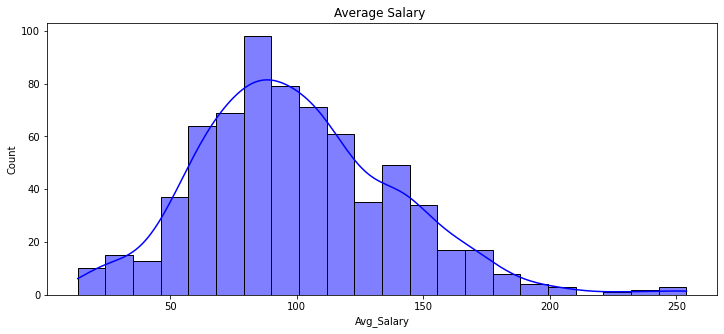

In [56]:
sns.histplot(df['Avg_Salary'],kde=True,color="b")
plt.title('Average Salary ');

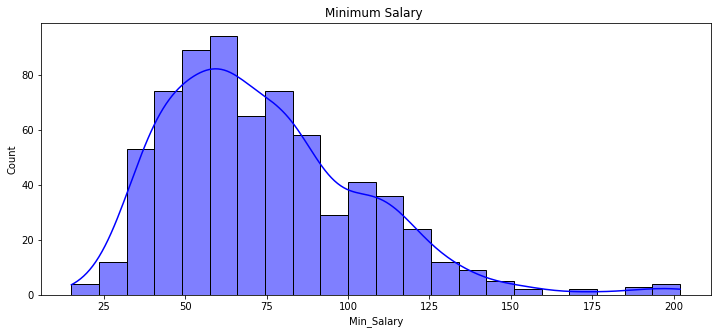

In [57]:
sns.histplot(df['Min_Salary'],kde=True,color="b")
plt.title('Minimum Salary ');

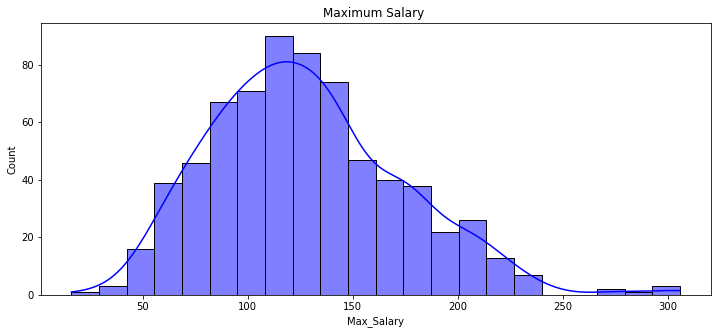

In [58]:
sns.histplot(df['Max_Salary'],kde=True,color="b")
plt.title('Maximum Salary ');

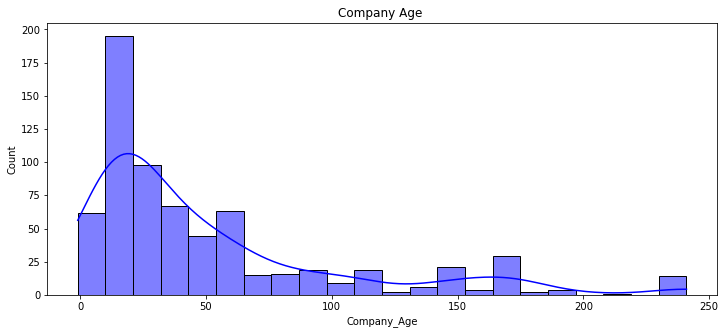

In [59]:
sns.histplot(df['Company_Age'],kde=True,color="b")
plt.title('Company Age ');

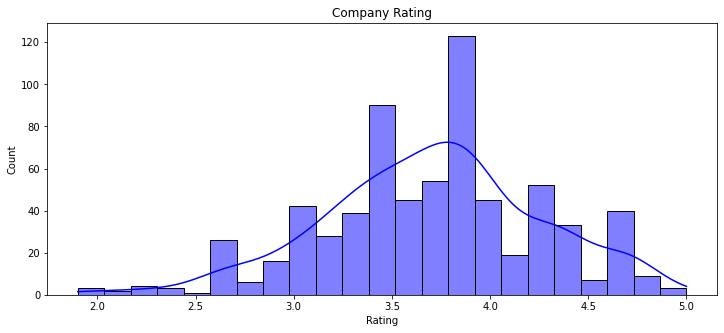

In [60]:
sns.histplot(df["Rating"],kde=True,color="b")
plt.title('Company Rating');

### Now lets find answers with visual analysis to the suggested questions. Starting with univariate then bivariate and finish our analysis with multivariate analysis.

<a id='01'></a>
## 01. Which Job has the most demand in the market?

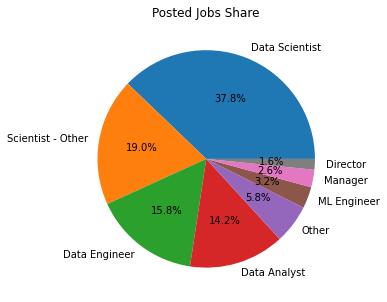

In [61]:
df['Job_Title_Simplified'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', label='');
plt.title('Posted Jobs Share');

From our pie chart, the most demand is for the Data Scientists

<a id='02'></a>
## 02. Top 5 Sectors with the highest job posts?

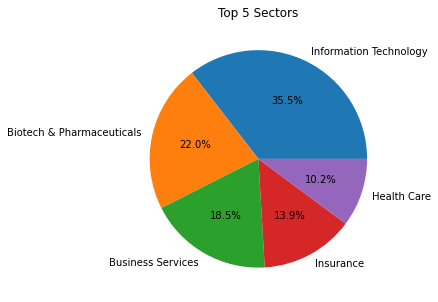

In [62]:
df['Sector'].value_counts().head(5).plot(kind = 'pie', autopct = '%1.1f%%', label='');
plt.title('Top 5 Sectors');

<a id='03'></a>
## 03. Top Other Jobs titles share the same roles in data science with most demand?

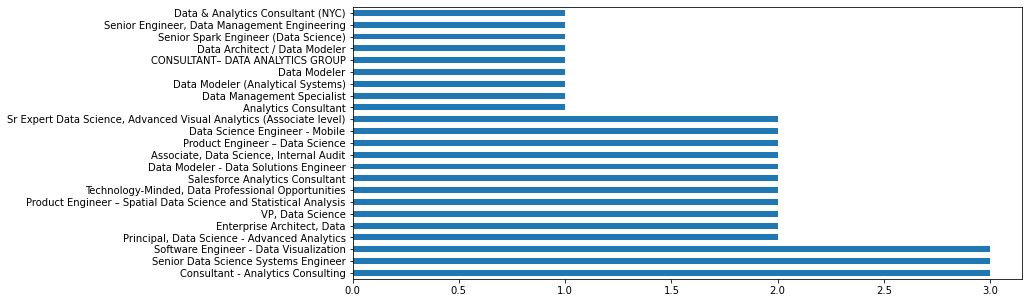

In [63]:
df['Job Title'][df['Job_Title_Simplified'].isin(['Other'])].value_counts().plot.barh();

_Software Engineer - Data Visualization_ wins the most demand job with same roles in data science.

<a id='04'></a>
## 04. Top 5 Industries with the highest job posts?

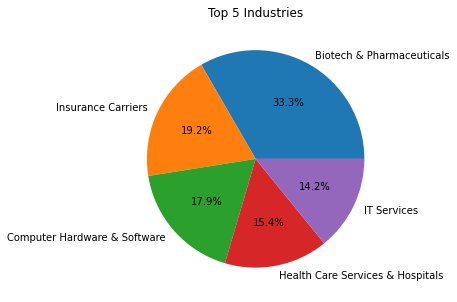

In [64]:
df['Industry'].value_counts().head(5).plot(kind = 'pie', autopct = '%1.1f%%', label='');
plt.title('Top 5 Industries');

<a id='05'></a>
## 05. What are the top needed skills for each job title?

In [65]:
skill_labels = ['Python', 'Spark', 'AWS', 'Excel', 'SQL', 'Tensorflow', 'Tableau']
skills_by_title = df.groupby('Job_Title_Simplified')[skill_labels].sum()
skills_by_title.style.background_gradient(cmap='Greens', axis='columns')

,Python,Spark,AWS,Excel,SQL,Tensorflow,Tableau
Job_Title_Simplified,,,,,,,
Data Analyst,32,6,8,75,72,0,40
Data Engineer,73,65,57,45,80,2,9
Data Scientist,202,75,66,131,150,51,65
Director,8,0,2,3,3,0,2
ML Engineer,18,4,6,7,13,9,0
Manager,5,1,1,13,12,1,12
Other,23,9,6,24,25,4,12
Scientist - Other,11,0,15,59,3,1,0


Python beside Excel and SQL skills and knowledge are on of the top needs in different Job roles

<a id='06'></a>
## 06. Which Job Title get paid Most?

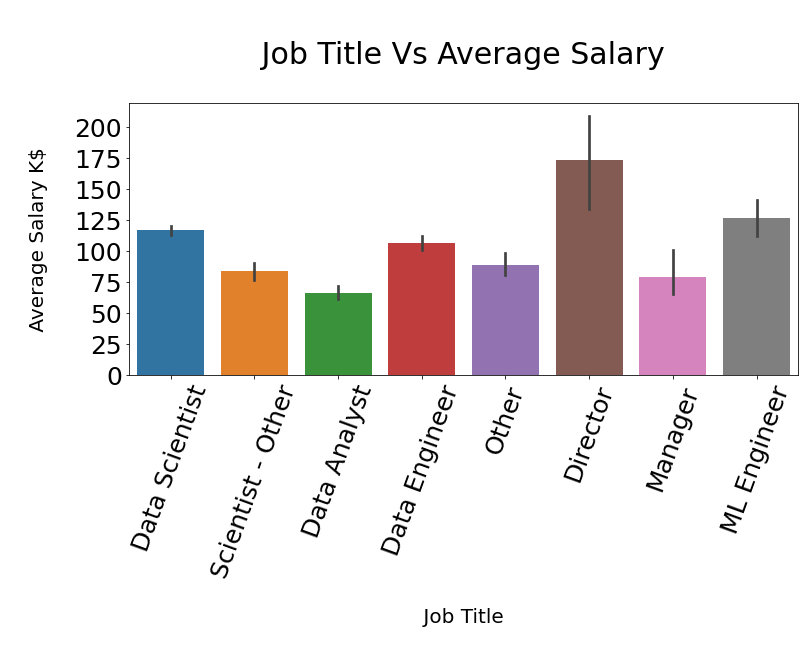

In [66]:
sns.barplot(y="Avg_Salary",x="Job_Title_Simplified",data=df)
#Beautifying the plot

plt.title('\n Job Title Vs Average Salary \n', size=30, color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('\n Job Title \n', fontsize=20, color='black')
plt.ylabel('\n Average Salary K$ \n', fontsize=20, color='black')
plt.xticks(rotation=70)
plt.show();

In [67]:
pd.pivot_table(df, index = 'Job_Title_Simplified', values = 'Avg_Salary')

,Avg_Salary
Job_Title_Simplified,
Data Analyst,66.31
Data Engineer,106.19
Data Scientist,116.51
Director,173.50
ML Engineer,126.43
Manager,79.06
Other,88.56
Scientist - Other,83.62


for higher upper mangement jobs the _Director_ is the most paid then goes the Machine Learning Engineer along with the _Data Scientist_

<a id='0708'></a>
## 07. Which state pays the highest average salary?
## 08. Minimum and Maximum Salaries in different states?

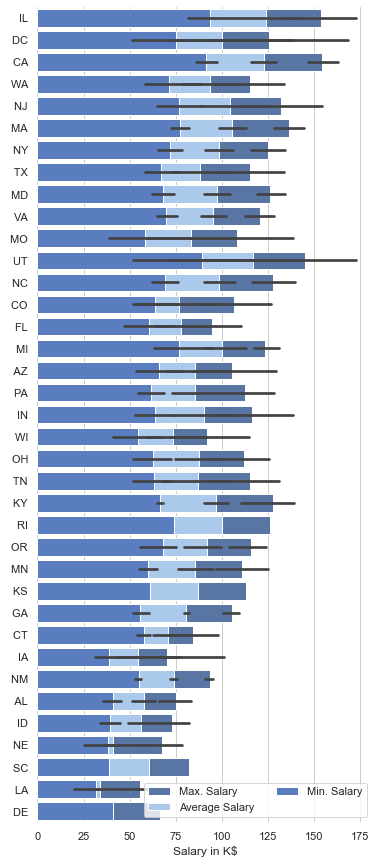

In [68]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
AV = df.sort_values("Avg_Salary", ascending=False)

# Plot the crashes where alcohol was involved
sns.set_color_codes("deep")
sns.barplot(x="Max_Salary", y="Job_State", data=AV,
            label="Max. Salary", color="b")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Avg_Salary", y="Job_State", data=AV,
            label="Average Salary", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Min_Salary", y="Job_State", data=AV,
            label="Min. Salary", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Salary in K$")
sns.despine(left=True, bottom=True)

The above plot combines the minimum, maximum and average salary with the states where _Illinois(IL)_ is the top average paying state followed by _washington(DC)_ , _California(CA)_.

<a id='09'></a>
## 09. Top 10 States with the Most jobs?

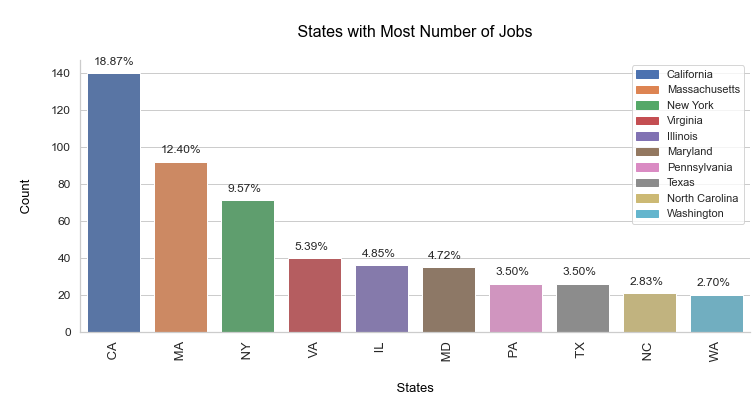

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1)
a = sns.barplot(x=df['Job_State'].value_counts().index[0:10], y = df['Job_State'].value_counts()[0:10])
# to remove borders
sns.despine(bottom = False, left = False)
# to add percentage above each bar (formula from Stackoverflow)
spots = df['Job_State'].value_counts().index[0:10]

for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+4.5, '{:.2f}%'.format((p.get_height()/742)*100))

# plot labels and settings
plt.title('\n States with Most Number of Jobs \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
#Adding labels for the states
lab=[
    "California","Massachusetts","New York","Virginia","Illinois","Maryland",
    "Pennsylvania","Texas","North Carolina","Washington"
]
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches, loc="upper right")
ax.tick_params(axis='x', rotation=90)
plt.show();

top ten states are _California,Massachusetts,New York,Virginia,Illinois,Maryland,Pennsylvania,Texas,North Carolina and Washington._

<a id='10'></a>
## 10. what is the Average Salary of each posted job title in each state?

In [70]:
pd.pivot_table(
    df, index = ['Job_State','Job_Title_Simplified'], 
               values = 'Avg_Salary'
    ).sort_values('Job_State', ascending = False)

Avg_Salary
Job_State Job_Title_Simplified            
 WI       Scientist - Other          54.00
          Data Scientist            113.50
          Data Analyst               58.83
 WA       Scientist - Other          97.50
          Data Scientist            100.44
...                                    ...
 AZ       Other                     124.50
 AL       Other                      48.00
          Data Engineer              65.00
          Scientist - Other          39.50
          Data Analyst               62.20

[117 rows x 1 columns]

<a id='11'></a>
## 11. Is there is a correlation between the Average salary and the company's age, number of competitors and Ratings?

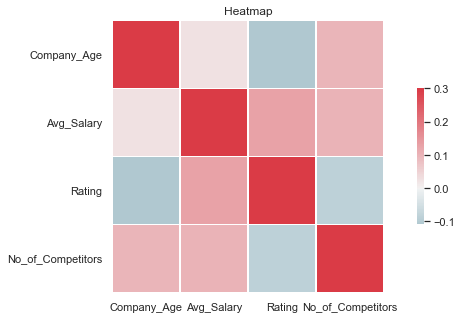

In [71]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    df[['Company_Age','Avg_Salary','Rating','No_of_Competitors']].corr(),vmax=.3, center=0,
    cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}
    )
plt.title('Heatmap');

<a id='12'></a>
## 12. Is there a relation between Average Salary, Company Age and their Compatitors with jobs?

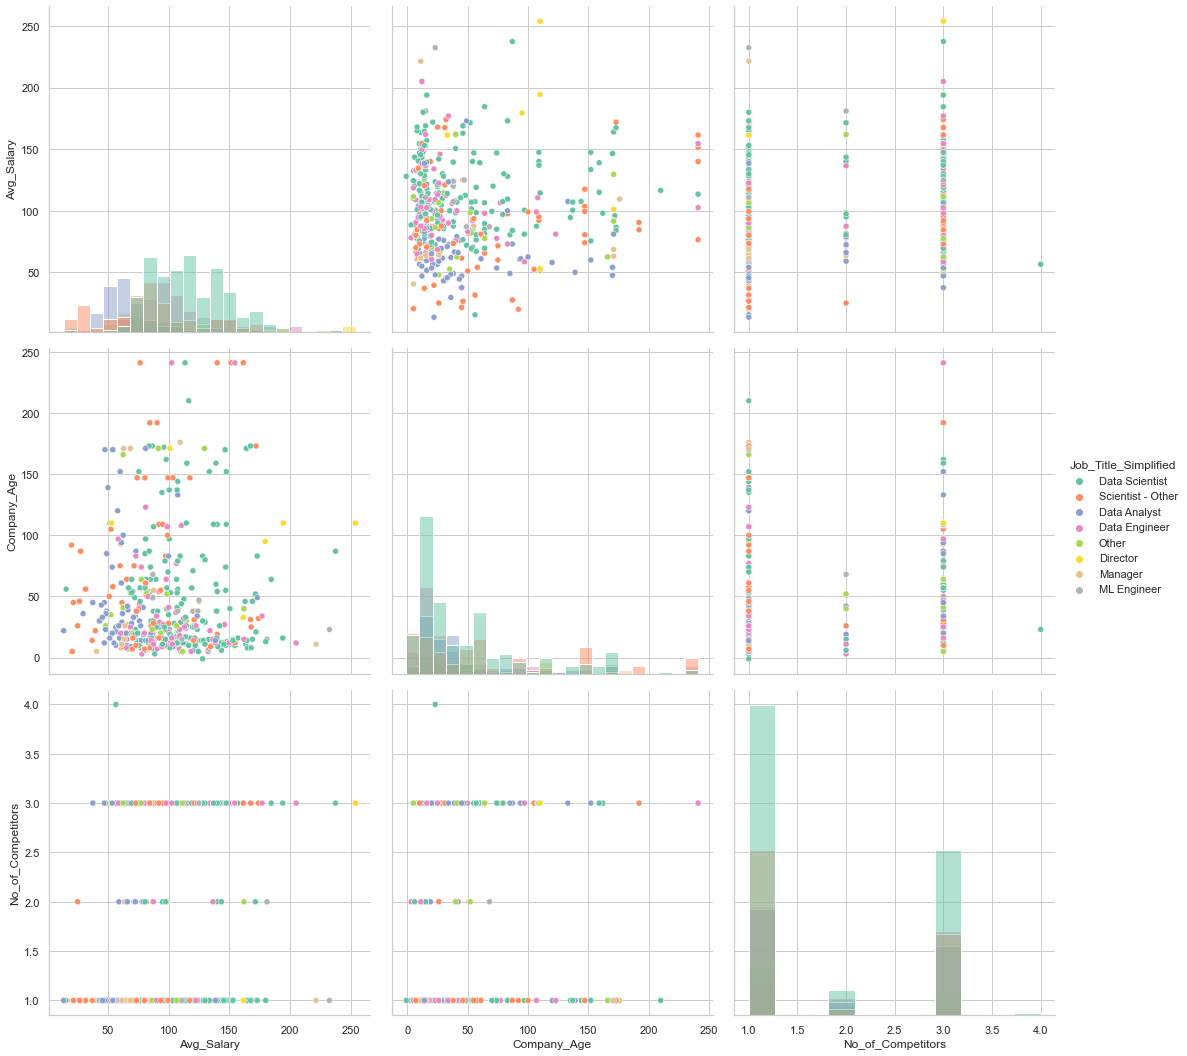

In [72]:
g = sns.PairGrid(df, hue='Job_Title_Simplified', 
                 vars = ['Avg_Salary', 'Company_Age', 'No_of_Competitors'], palette="Set2",height=5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

there is a weak correlation between company age and average salary but there is no correlation between them and the number of company's competitors

<a id='13'></a>
## 13. What is the relation between Average Salary and Company Size with different Job Titles?

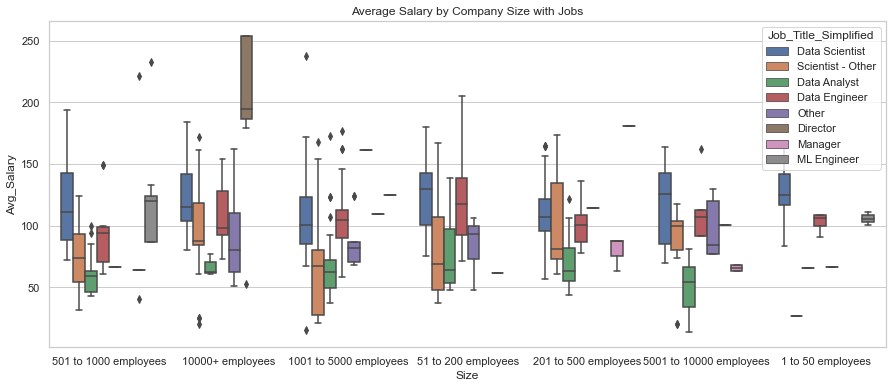

In [73]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Size', y = 'Avg_Salary', hue = 'Job_Title_Simplified');
plt.title('Average Salary by Company Size with Jobs');

For each job title, we see that the Average Salary is more likely to be higher as the company size is bigger.

<a id='Conclusion'></a>
## Conclusion:

> Insights Summary:

> 01. Most of the companies are rated between 3.5 - 4 (~3.7).
> 02. Most of the companies posted jobs are less than 50 years old. while limited companies with more than 200 years old. 
> 03. the average salary for the lowest salary range is 74.05 while the highest salary 127.87 with and mean average overall is 100.13 in thousand of US dollars.
> 04. Data Scientist position got the most number of jobs needs with 37.8%, while different scientists jobs required the same skill in data science with 19%, Data Engineers, Data analyst share was 15.8%, 14.2% respectively and the rest were for the mangement, directior and other not directly related with 13.2%.
> As for the jobs not directly related to data science, the "Software Engineer", "System Engineer" and "Analytics Consultant" were the top jobs needed.
> 05. The Information Technology Sector and the BioTech took more than 57% of the jobs divided into 35.5% and 22% respectively followed by the business services with 18.5%.
> 06. with involving industies of Biotech & Pharmaceuticals and Health Care Services & Hospitals 48.7%(33.3% + 15.4%), while Insurance Carriers, Computer Hardware & Software and IT Services scored more than 50% together ( 51.3%).
> 07. Python beside Excel and SQL skills and knowledge are on of the top needs in different Job roles
> 08. for higher upper mangement jobs like Directors is the most paid then goes the Machine Learning Engineer along with the Data Scientist.
> 09. California has the most number of posted jobs.
> 10. Illinois(IL) is the top average paying salary state followed by washington(DC) , California(CA).
Both California and Illinois has almost the same average minimal annual salary.
> 11. Pennsylvania has the lowest average minimum annual salary among the top 10 states.
> 12. Washington has the lowest average maximum annual salary among the top 10 states.
> 13. California has the highest average annual salary, followed by Illinois. 
> 14. there is a weak corr. between the average salary and rating but not with the company age.
> 15. there is correlation between average salary and company age , Rating & the number of company's competitors only.
> 16. for each job title, the Average Salary is more likely to be higher as the company size is bigger.

<a id='References'></a>
## References:
Dataset Source

https://github.com/PlayingNumbers/ds_salary_proj/raw/master/glassdoor_jobs.csv

Support documents:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib

https://stackoverflow.com/questions/61908745/error-astype-got-an-unexpected-keyword-argument-categories
